<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [40]:
!pip install pandas

In [41]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [42]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-08-03 17:42:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: 'survey-data.csv'

     0K .......... .......... .......... .......... ..........  0% 1.24M 2m3s
    50K .......... .......... .......... .......... ..........  0% 4.11M 80s
   100K .......... .......... .......... .......... ..........  0% 2.01M 78s
   150K .......... .......... .......... .......... ..........  0% 16.2M 61s
   200K .......... .......... .......... .......... ..........  0% 2.82M 60s
   250K .......... .......... .......... .......... ..

### Step 2: Import necessary libraries and load the dataset


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [44]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [45]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [46]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



C:\Users\beall\AppData\Local\Temp\ipykernel_16932\3070370420.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


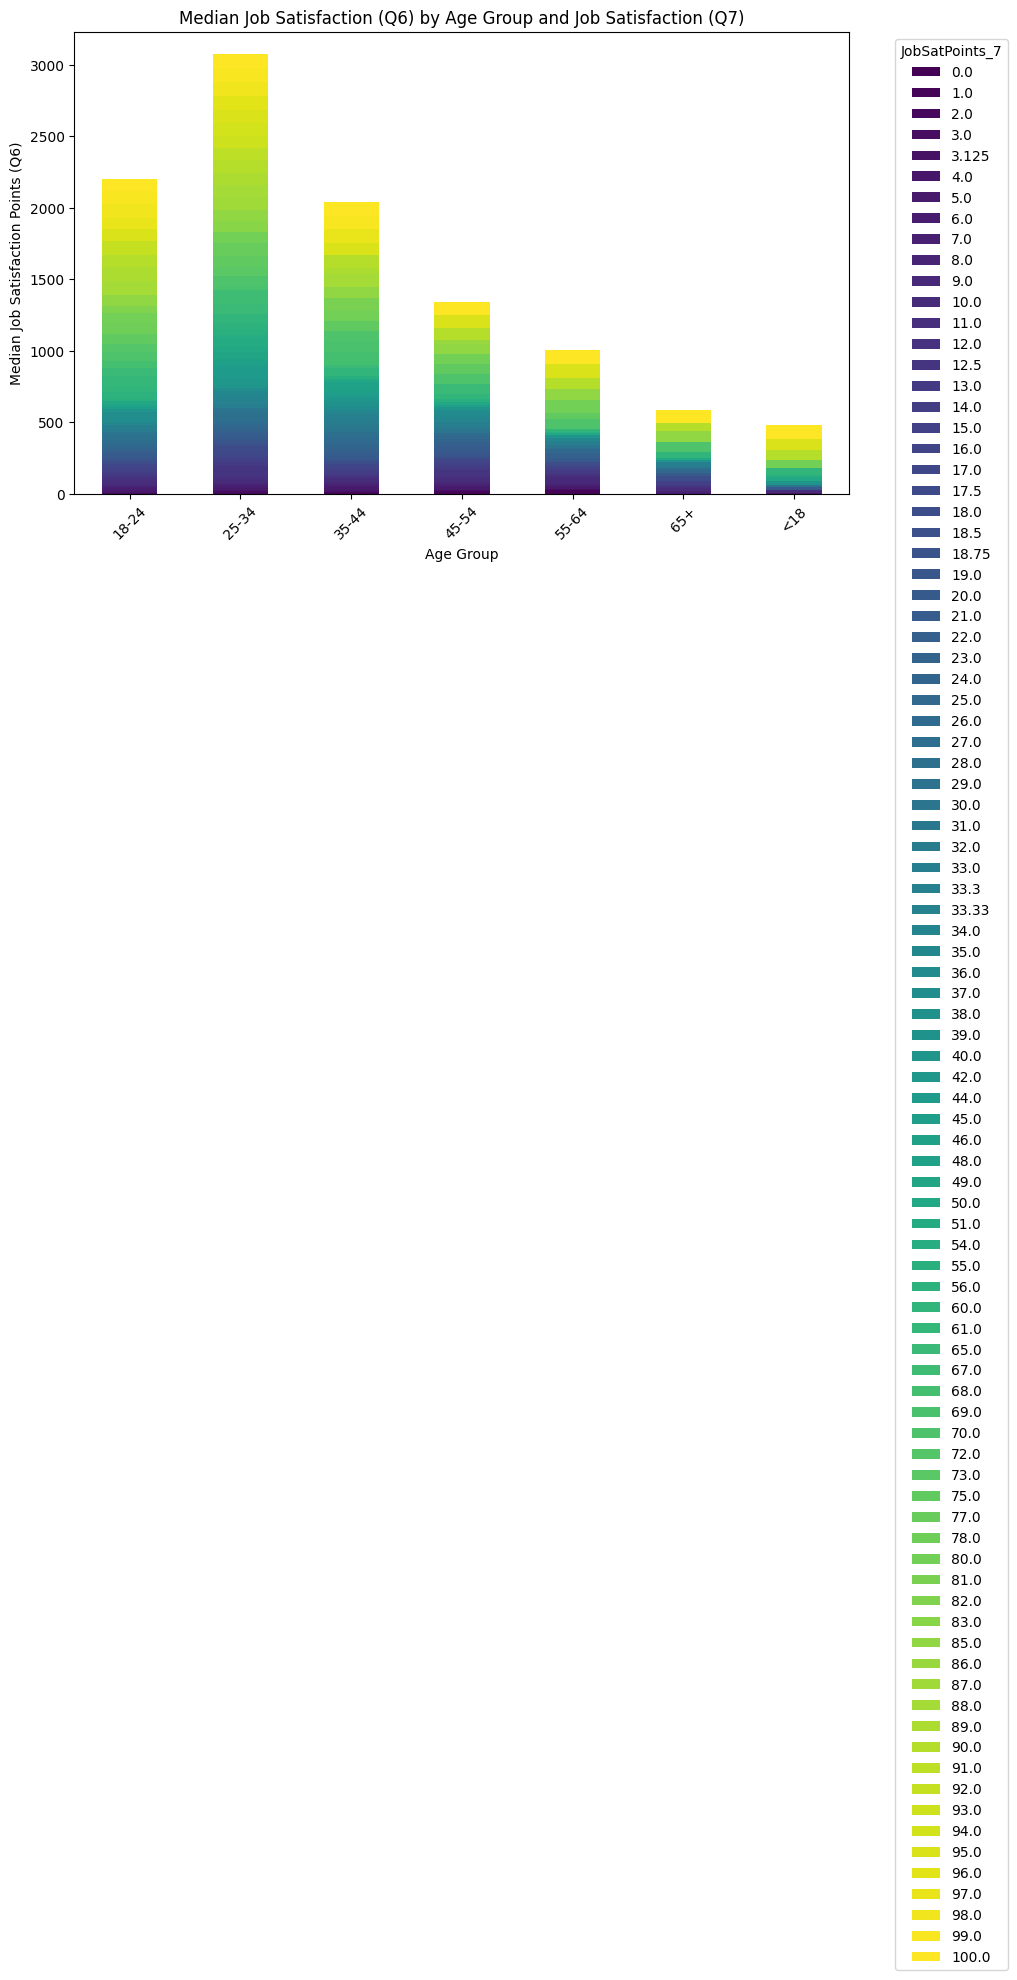

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Manually map string age ranges to simplified age groups
age_map = {
    'Under 18 years old': '<18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+'
}

# Step 2: Apply the map to create 'AgeGroup'
df['AgeGroup'] = df['Age'].map(age_map)

# Step 3: Convert other columns to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

# Step 4: Drop rows with missing data
df_clean = df.dropna(subset=['AgeGroup', 'JobSatPoints_6', 'JobSatPoints_7'])

# Step 5: Group and compute median
median_df = df_clean.groupby(['AgeGroup', 'JobSatPoints_7'])['JobSatPoints_6'].median().unstack(fill_value=0)

# Step 6: Plot
median_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis'
)

plt.title('Median Job Satisfaction (Q6) by Age Group and Job Satisfaction (Q7)')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points (Q6)')
plt.xticks(rotation=45)
plt.legend(title='JobSatPoints_7', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\beall\AppData\Local\Temp\ipykernel_16932\2987014821.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['AgeGroup', 'JobSatPoints_7'])['JobSatPoints_6']


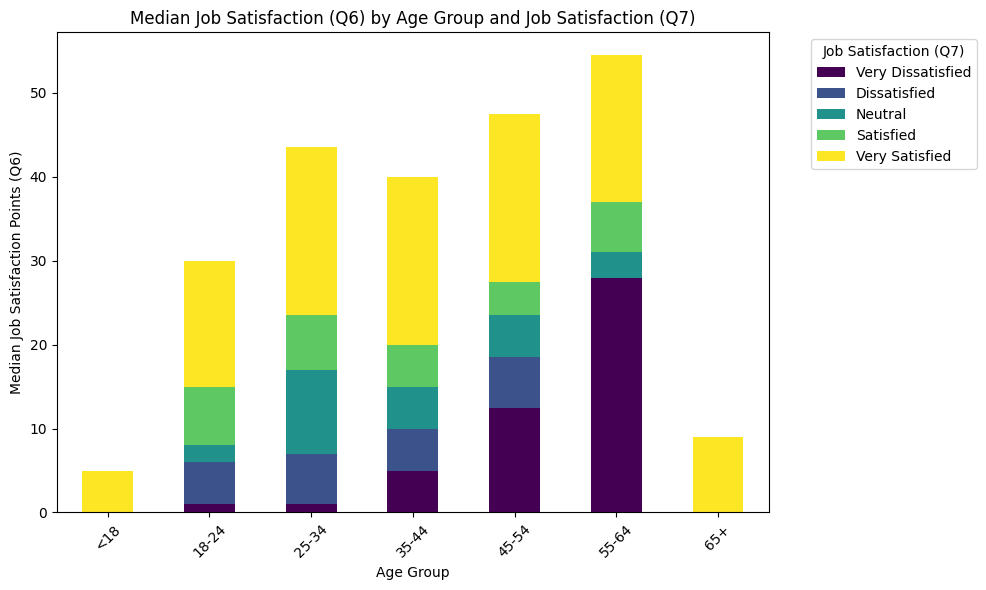

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define mapping from raw 'Age' strings to simpler groups
age_map = {
    'Under 18 years old': '<18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+'
    # 'Prefer not to say' will be excluded automatically
}

# Step 2: Map age strings to cleaned age groups
df['AgeGroup'] = df['Age'].map(age_map)

# Step 3: Convert satisfaction columns to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

# Step 4: Drop missing values in key columns
df_clean = df.dropna(subset=['AgeGroup', 'JobSatPoints_6', 'JobSatPoints_7'])

# 🔧 Step 5: Filter JobSatPoints_7 to only include values 1–5
df_clean = df_clean[df_clean['JobSatPoints_7'].isin([1, 2, 3, 4, 5])]

# Step 6: Ensure proper order of AgeGroup categories
age_order = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_clean['AgeGroup'] = pd.Categorical(df_clean['AgeGroup'], categories=age_order, ordered=True)

# Step 7: Group and compute median JobSatPoints_6
median_df = (
    df_clean
    .groupby(['AgeGroup', 'JobSatPoints_7'])['JobSatPoints_6']
    .median()
    .unstack(fill_value=0)
)

# 🔧 Step 8: Rename columns to descriptive labels for legend
sat7_labels = {
    1: 'Very Dissatisfied',
    2: 'Dissatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very Satisfied'
}
median_df.rename(columns=sat7_labels, inplace=True)

# Step 9: Plot the stacked bar chart
median_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis'
)

plt.title('Median Job Satisfaction (Q6) by Age Group and Job Satisfaction (Q7)')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points (Q6)')
plt.xticks(rotation=45)
plt.legend(title='Job Satisfaction (Q7)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [49]:
# show unique values in 'Age'

df['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


In [50]:
# show columns with 'Employment'complex

status_columns = [col for col in df.columns if 'Employment' in col]
print(status_columns)


['Employment']


In [51]:
# show 'Employment' column

employment_columns = [col for col in df.columns if 'Employment' in col]
employment_df = df[employment_columns]
employment_df.head()

,Employment
0,"Employed, full-time"
1,"Employed, full-time"
2,"Employed, full-time"
3,"Student, full-time"
4,"Student, full-time"


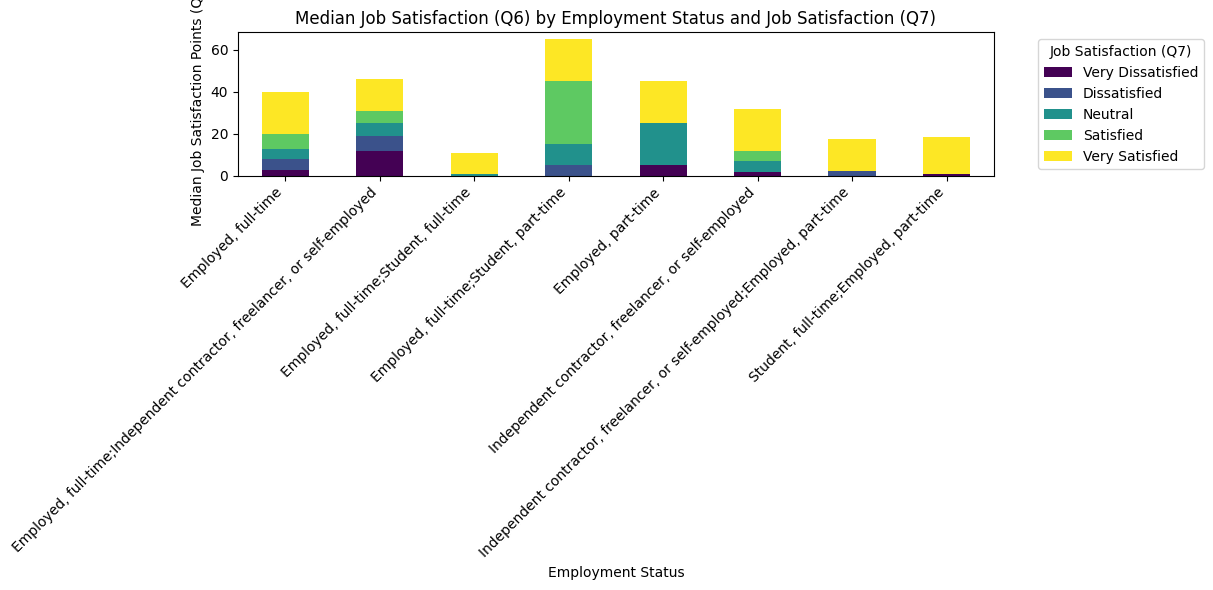

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert satisfaction columns to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

# Step 2: Drop missing values in key columns
df_clean = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

# 🔧 Step 3: Filter JobSatPoints_7 to include only values 1–5
df_clean = df_clean[df_clean['JobSatPoints_7'].isin([1, 2, 3, 4, 5])]

# Step 4: Optional – Clean up employment categories (if needed)
# For example, limit to top categories:
top_employment = df_clean['Employment'].value_counts().nlargest(8).index
df_clean = df_clean[df_clean['Employment'].isin(top_employment)]

# Step 5: Group and compute median JobSatPoints_6
median_df = (
    df_clean
    .groupby(['Employment', 'JobSatPoints_7'])['JobSatPoints_6']
    .median()
    .unstack(fill_value=0)
)

# 🔧 Step 6: Rename JobSatPoints_7 columns to descriptive labels
sat7_labels = {
    1: 'Very Dissatisfied',
    2: 'Dissatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very Satisfied'
}
median_df.rename(columns=sat7_labels, inplace=True)

# Step 7: Plot the stacked bar chart
median_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='viridis'
)

plt.title('Median Job Satisfaction (Q6) by Employment Status and Job Satisfaction (Q7)')
plt.xlabel('Employment Status')
plt.ylabel('Median Job Satisfaction Points (Q6)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction (Q7)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


C:\Users\beall\AppData\Local\Temp\ipykernel_16932\1063054169.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CompBin'] = pd.cut(df_filtered['ConvertedCompYearly'], bins=comp_bins, labels=comp_labels)
C:\Users\beall\AppData\Local\Temp\ipykernel_16932\1063054169.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['CompBin', 'JobSatPoints_6'])


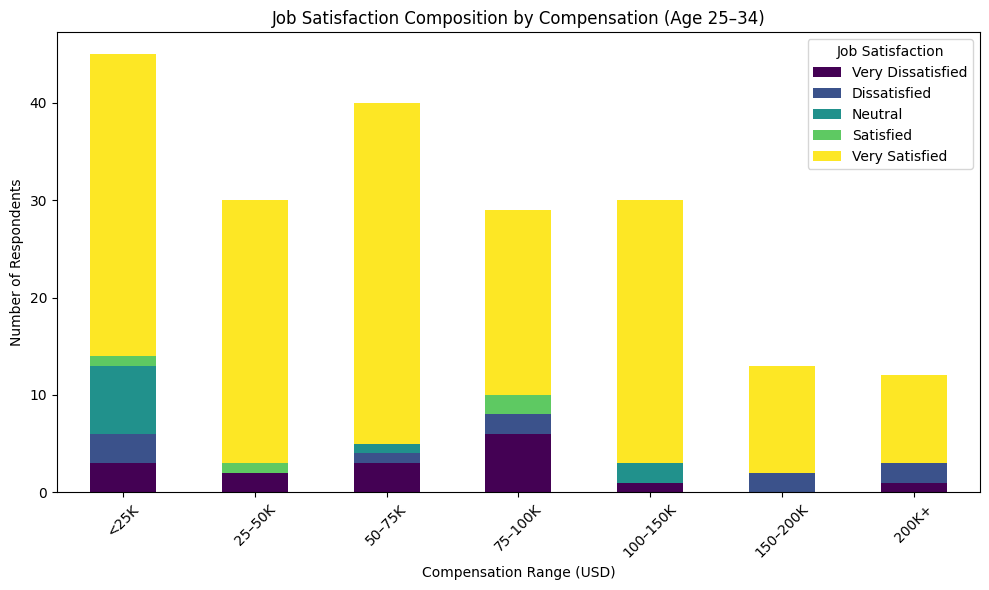

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert satisfaction & comp to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Step 2: Filter to respondents aged 25–34 (includes 30–35 range)
df_filtered = df[
    (df['Age'] == '25-34 years old') &
    df['ConvertedCompYearly'].notna() &
    df['JobSatPoints_6'].notna()
]

# Step 3: Define compensation bins
comp_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, float('inf')]
comp_labels = ['<25K', '25–50K', '50–75K', '75–100K', '100–150K', '150–200K', '200K+']
df_filtered['CompBin'] = pd.cut(df_filtered['ConvertedCompYearly'], bins=comp_bins, labels=comp_labels)

# Step 4: Filter satisfaction values to expected range (adjust if your scale differs)
df_filtered = df_filtered[df_filtered['JobSatPoints_6'].isin([1, 2, 3, 4, 5])]

# Step 5: Group and count occurrences
stacked_data = (
    df_filtered
    .groupby(['CompBin', 'JobSatPoints_6'])
    .size()
    .unstack(fill_value=0)
)

# Step 6: Rename columns for cleaner legend
sat_labels = {
    1: 'Very Dissatisfied',
    2: 'Dissatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very Satisfied'
}
stacked_data.rename(columns=sat_labels, inplace=True)

# Step 7: Plot
stacked_data.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis'
)

plt.title('Job Satisfaction Composition by Compensation (Age 25–34)')
plt.xlabel('Compensation Range (USD)')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Job Satisfaction')
plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


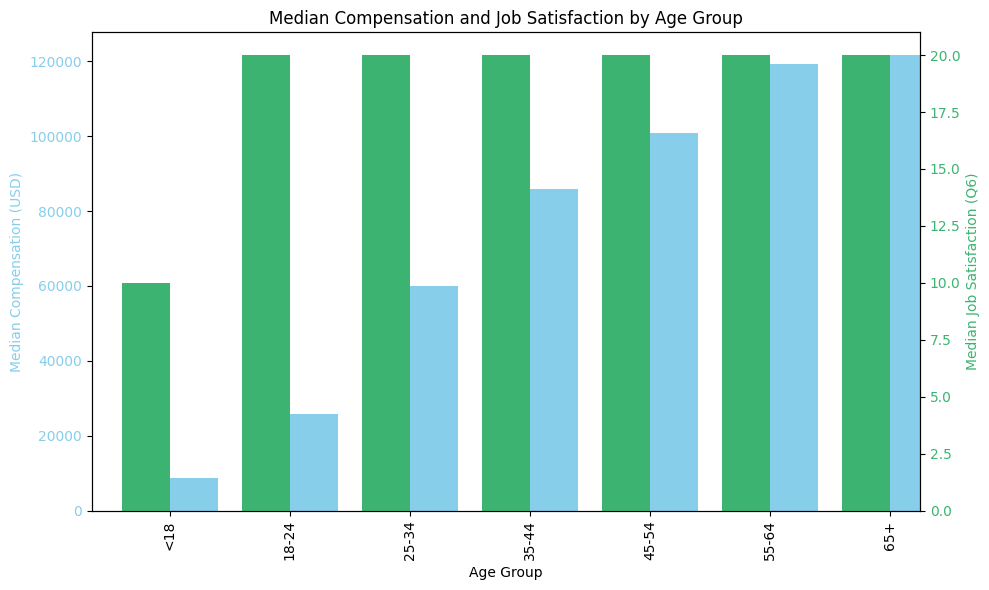

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert relevant columns to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Step 2: Clean age groups (if not already simplified)
age_map = {
    'Under 18 years old': '<18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+'
}
df['AgeGroup'] = df['Age'].map(age_map)

# Step 3: Drop missing values in key fields
df_clean = df.dropna(subset=['AgeGroup', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Step 4: Calculate medians by age group
median_metrics = df_clean.groupby('AgeGroup')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Step 5: Sort by age order
age_order = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
median_metrics = median_metrics.reindex(age_order)

# Step 6: Plot side-by-side bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

median_metrics[['ConvertedCompYearly']].plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4, legend=False)
ax1.set_ylabel('Median Compensation (USD)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Secondary axis for satisfaction
ax2 = ax1.twinx()
median_metrics[['JobSatPoints_6']].plot(kind='bar', ax=ax2, color='mediumseagreen', position=1, width=0.4, legend=False)
ax2.set_ylabel('Median Job Satisfaction (Q6)', color='mediumseagreen')
ax2.tick_params(axis='y', labelcolor='mediumseagreen')

# Final formatting
plt.title('Median Compensation and Job Satisfaction by Age Group')
ax1.set_xlabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


C:\Users\beall\AppData\Local\Temp\ipykernel_16932\1235113770.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DatabaseList'] = df_clean['DatabaseWantToWorkWith'].str.split(';')


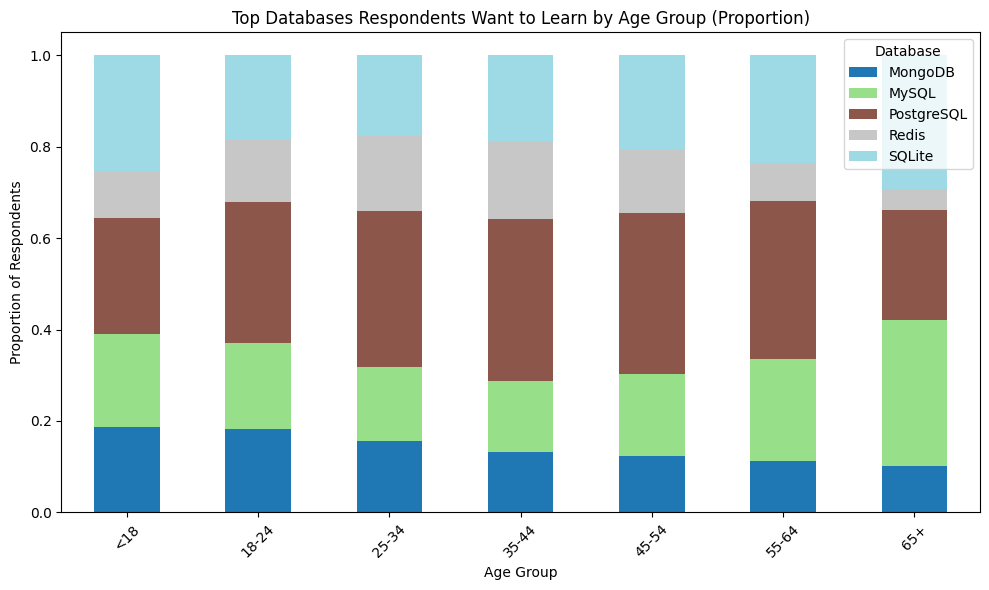

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Clean Age column into age groups
age_map = {
    'Under 18 years old': '<18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+'
}
df['AgeGroup'] = df['Age'].map(age_map)

# Step 2: Drop missing age or database data
df_clean = df.dropna(subset=['AgeGroup', 'DatabaseWantToWorkWith'])

# Step 3: Split databases and explode
df_clean['DatabaseList'] = df_clean['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df_clean.explode('DatabaseList')
df_exploded['DatabaseList'] = df_exploded['DatabaseList'].str.strip()

# Step 4: Find top N databases overall
top_dbs = (
    df_exploded['DatabaseList']
    .value_counts()
    .nlargest(5)
    .index
)

# Step 5: Filter to top databases only
df_top = df_exploded[df_exploded['DatabaseList'].isin(top_dbs)]

# Step 6: Create crosstab and normalize
crosstab = pd.crosstab(df_top['AgeGroup'], df_top['DatabaseList'])
crosstab_prop = crosstab.div(crosstab.sum(axis=1), axis=0)  # Normalize rows

# Optional: sort age groups
age_order = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
crosstab_prop = crosstab_prop.reindex(age_order)

# Step 7: Plot
crosstab_prop.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

plt.title('Top Databases Respondents Want to Learn by Age Group (Proportion)')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Database')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


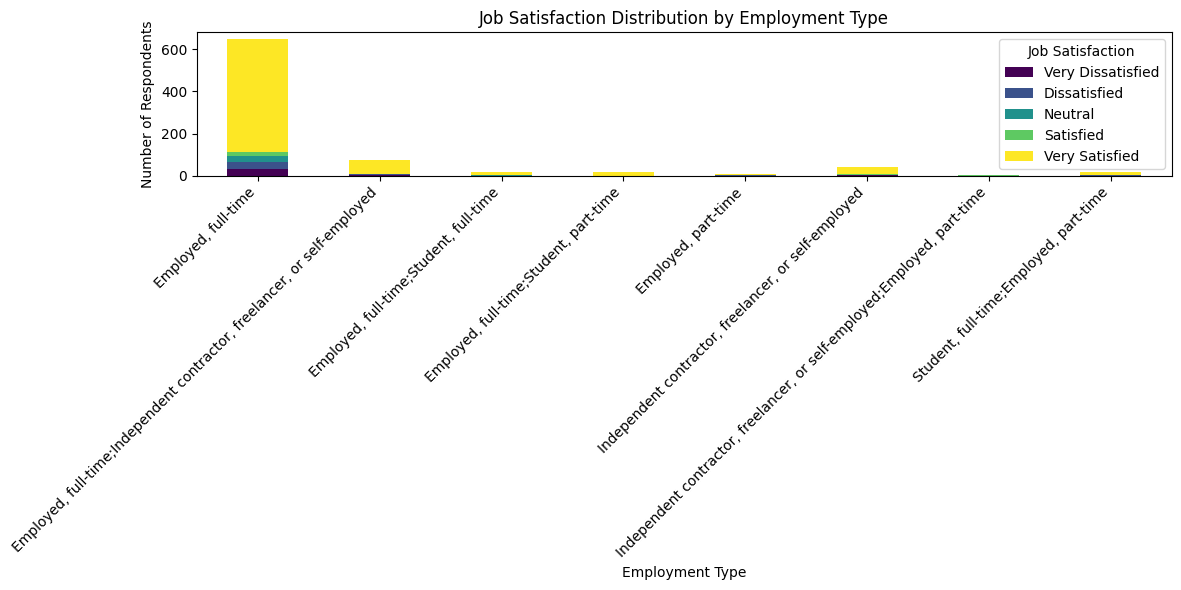

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert JobSatPoints_6 to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Step 2: Drop rows with missing values
df_clean = df.dropna(subset=['Employment', 'JobSatPoints_6'])

# Step 3: Filter to expected satisfaction scale (adjust if needed)
df_clean = df_clean[df_clean['JobSatPoints_6'].isin([1, 2, 3, 4, 5])]

# Step 4: Limit to top N employment types (for readability)
top_employment = df_clean['Employment'].value_counts().nlargest(8).index
df_filtered = df_clean[df_clean['Employment'].isin(top_employment)]

# Step 5: Create stacked count matrix
stacked_data = (
    df_filtered
    .groupby(['Employment', 'JobSatPoints_6'])
    .size()
    .unstack(fill_value=0)
)

# Optional: Rename columns for cleaner legend
sat_labels = {
    1: 'Very Dissatisfied',
    2: 'Dissatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very Satisfied'
}
stacked_data.rename(columns=sat_labels, inplace=True)

# Step 6: Plot
stacked_data.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='viridis'
)

plt.title('Job Satisfaction Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction')
plt.tight_layout()
plt.show()


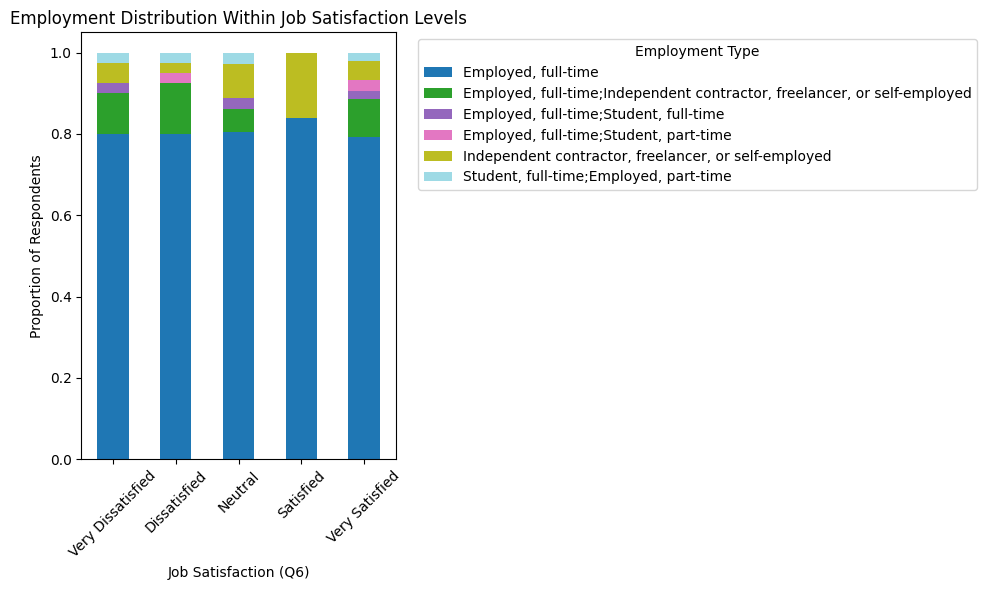

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert JobSatPoints_6 to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Step 2: Drop missing values
df_clean = df.dropna(subset=['Employment', 'JobSatPoints_6'])

# Step 3: Filter to expected satisfaction scale (1–5)
df_clean = df_clean[df_clean['JobSatPoints_6'].isin([1, 2, 3, 4, 5])]

# Step 4: Limit to most common employment types
top_employment = df_clean['Employment'].value_counts().nlargest(6).index
df_filtered = df_clean[df_clean['Employment'].isin(top_employment)]

# Step 5: Create crosstab: rows = Job Satisfaction, columns = Employment type
crosstab = pd.crosstab(df_filtered['JobSatPoints_6'], df_filtered['Employment'])

# Step 6: Normalize by row to show proportions
crosstab_prop = crosstab.div(crosstab.sum(axis=1), axis=0)

# Step 7: Rename satisfaction labels (optional)
crosstab_prop.index = crosstab_prop.index.map({
    1: 'Very Dissatisfied',
    2: 'Dissatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very Satisfied'
})

# Step 8: Plot
crosstab_prop.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab20'
)

plt.title('Employment Distribution Within Job Satisfaction Levels')
plt.xlabel('Job Satisfaction (Q6)')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


C:\Users\beall\AppData\Local\Temp\ipykernel_16932\894185403.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LanguageList'] = df_clean['LanguageAdmired'].str.split(';')


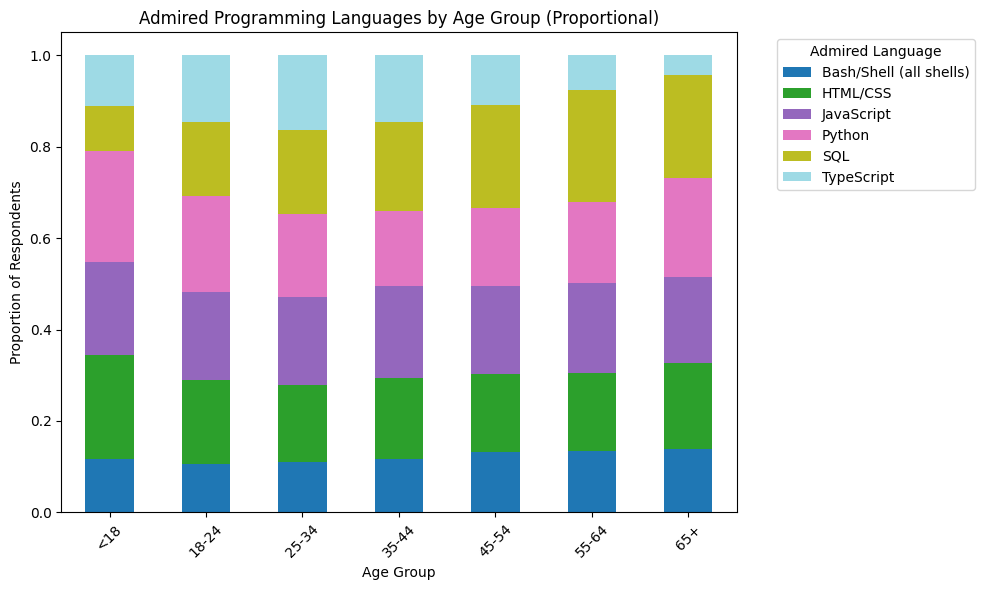

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Map age to simpler groups
age_map = {
    'Under 18 years old': '<18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+'
}
df['AgeGroup'] = df['Age'].map(age_map)

# Step 2: Drop missing AgeGroup or LanguageAdmired
df_clean = df.dropna(subset=['AgeGroup', 'LanguageAdmired'])

# Step 3: Split and explode admired languages
df_clean['LanguageList'] = df_clean['LanguageAdmired'].str.split(';')
df_exploded = df_clean.explode('LanguageList')
df_exploded['LanguageList'] = df_exploded['LanguageList'].str.strip()

# Step 4: Focus on top 6 admired languages overall
top_languages = df_exploded['LanguageList'].value_counts().nlargest(6).index
df_top = df_exploded[df_exploded['LanguageList'].isin(top_languages)]

# Step 5: Create crosstab (AgeGroup x Language)
crosstab = pd.crosstab(df_top['AgeGroup'], df_top['LanguageList'])

# Step 6: Normalize by row (proportions within each age group)
crosstab_prop = crosstab.div(crosstab.sum(axis=1), axis=0)

# Optional: ensure age order
age_order = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
crosstab_prop = crosstab_prop.reindex(age_order)

# Step 7: Plot
crosstab_prop.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab20'
)

plt.title('Admired Programming Languages by Age Group (Proportional)')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Admired Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


C:\Users\beall\AppData\Local\Temp\ipykernel_16932\108438404.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['PlatformList'] = df_clean['PlatformAdmired'].str.split(';')


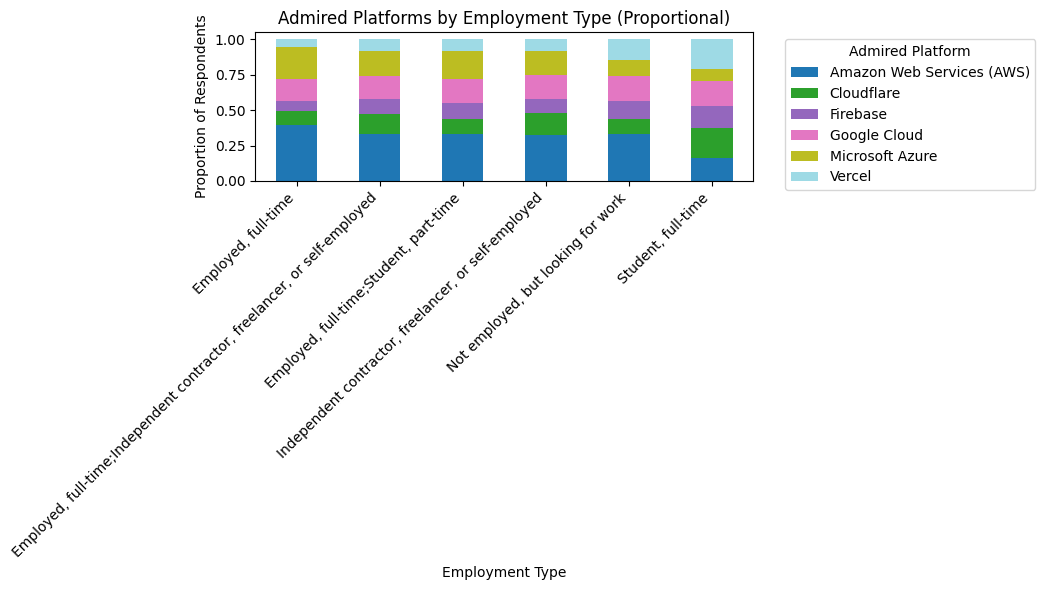

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values in PlatformAdmired or Employment
df_clean = df.dropna(subset=['Employment', 'PlatformAdmired'])

# Step 2: Split and explode PlatformAdmired entries
df_clean['PlatformList'] = df_clean['PlatformAdmired'].str.split(';')
df_exploded = df_clean.explode('PlatformList')
df_exploded['PlatformList'] = df_exploded['PlatformList'].str.strip()

# Step 3: Limit to top 6 admired platforms overall
top_platforms = df_exploded['PlatformList'].value_counts().nlargest(6).index
df_top = df_exploded[df_exploded['PlatformList'].isin(top_platforms)]

# Step 4: Limit to top 6 employment types for readability
top_employment = df_top['Employment'].value_counts().nlargest(6).index
df_top = df_top[df_top['Employment'].isin(top_employment)]

# Step 5: Crosstab (Employment x Platform)
crosstab = pd.crosstab(df_top['Employment'], df_top['PlatformList'])

# Step 6: Normalize rows to show proportions
crosstab_prop = crosstab.div(crosstab.sum(axis=1), axis=0)

# Step 7: Plot
crosstab_prop.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab20'
)

plt.title('Admired Platforms by Employment Type (Proportional)')
plt.xlabel('Employment Type')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Admired Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
